# Assignment 3

dilakukan import basic library yang akan digunakan.

In [72]:
# import library yang akan digunakan  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Load Data
masukkan data bank additional full yang akan digunakan dalam bentuk csv.

In [190]:
df = pd.read_csv("bank-additional-full.csv", sep =';')

In [191]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [193]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [194]:
df.shape

(41188, 21)

## Preprocessing : Data Cleaning
Sebelum melakukan analisis data, dilakukan terlebih dahulu langkah pre processing data agar data yang akan dianalisis sudah cukup baik sehingga tidak terjadi garbage in dan garbage out.
### Melihat Missing Value
 dilakukan pencarian apakah terdapat data hilang (*Standard missing value*) menggunakan library pandas.

In [195]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [196]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

dikarenakan tidak terdapat data kosong atau data hilang maka analisis dapat dilanjutkan. 
*data clean*

## Converting dependent categorical variable 
dilakukan analisis statistik deskriptif unruk masing-masing variabel yang memiliki tipe data integer dan float.

In [79]:
df.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


dilakukan convert variabel yang bersidat kategorik menjadi dummy variabel.

In [80]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


selanjutnya dilakukan encoding untuk variabel yang bersifat kategorikal dengan tipe data object.

In [92]:
### Encoding Categorical Features
objfeatures = df.select_dtypes(include="object").columns
le = preprocessing.LabelEncoder()

for feat in objfeatures:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [93]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Sebelum dilakukan pemilihan model, dilakukan visuali data secara deskriptif menggunakan grafik.

## Visualization

In [199]:
# Visualize
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


In [200]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)          

Job


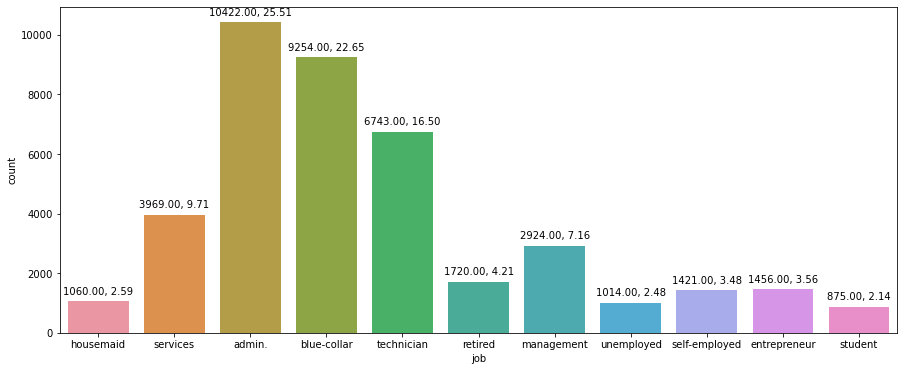

Marital


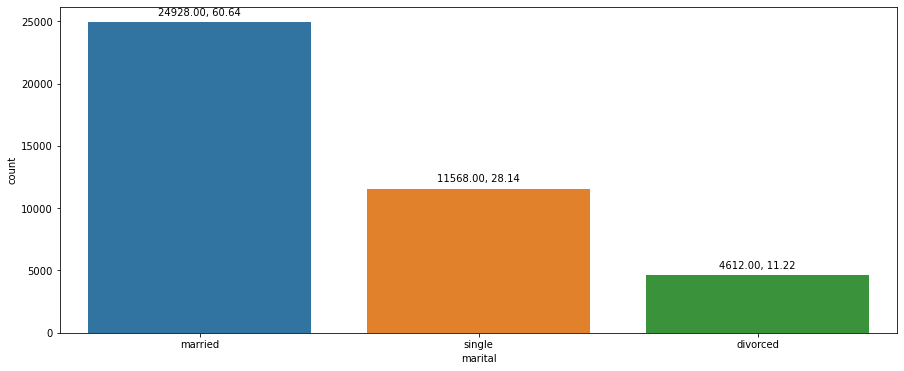

Education


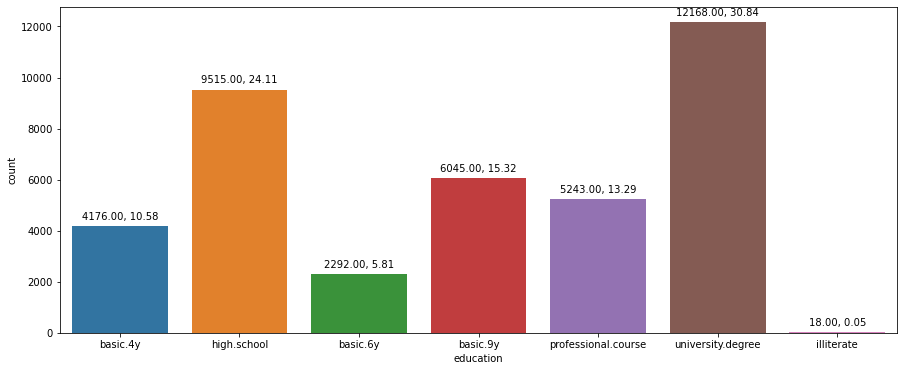

Default


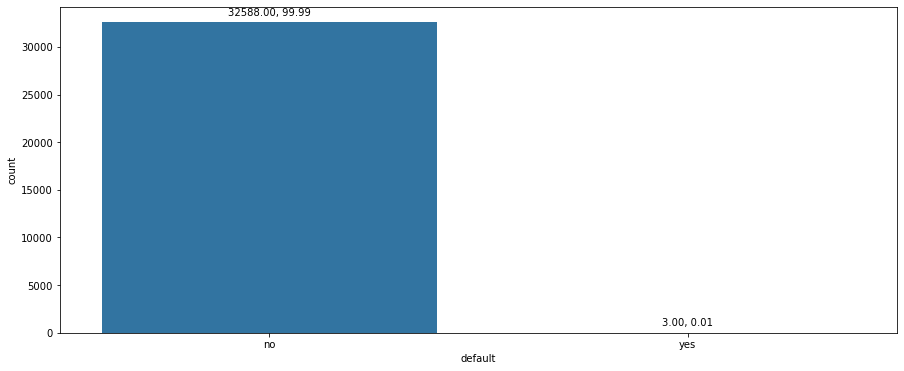

Housing


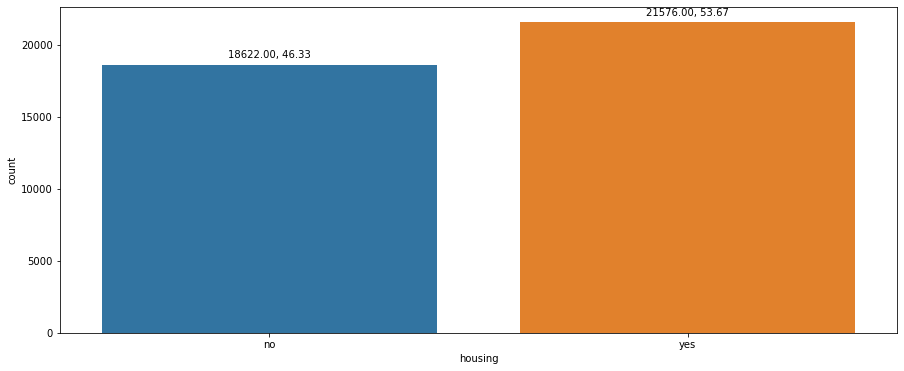

Loan


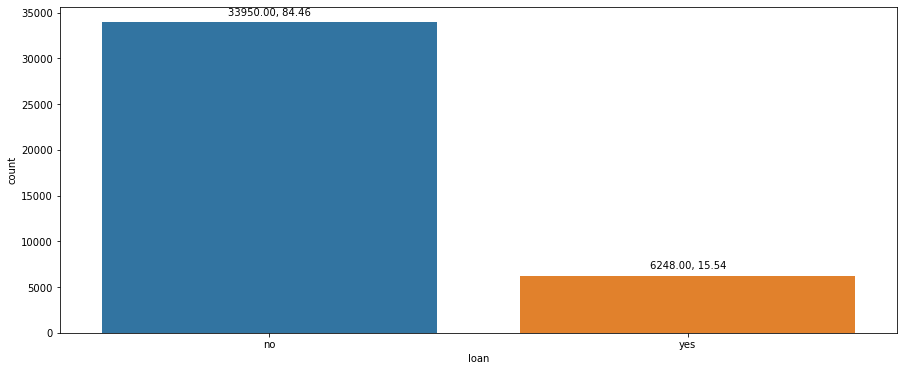

Contact


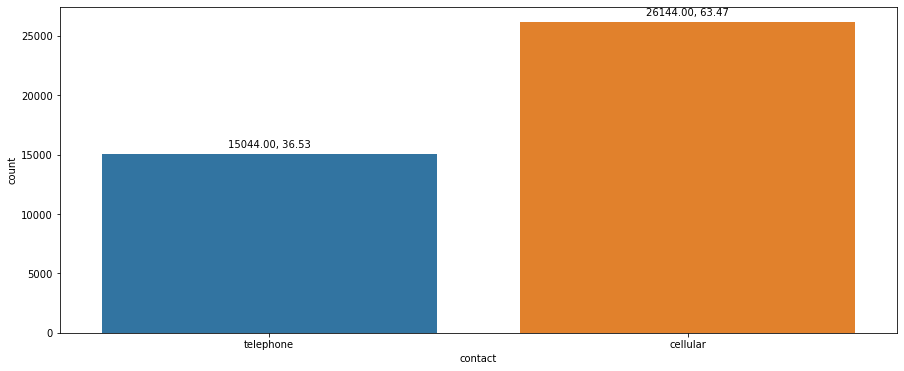

Month


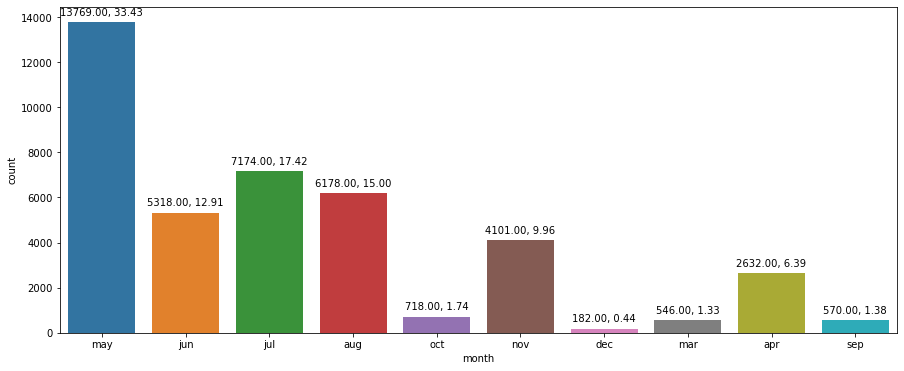

Day_Of_Week


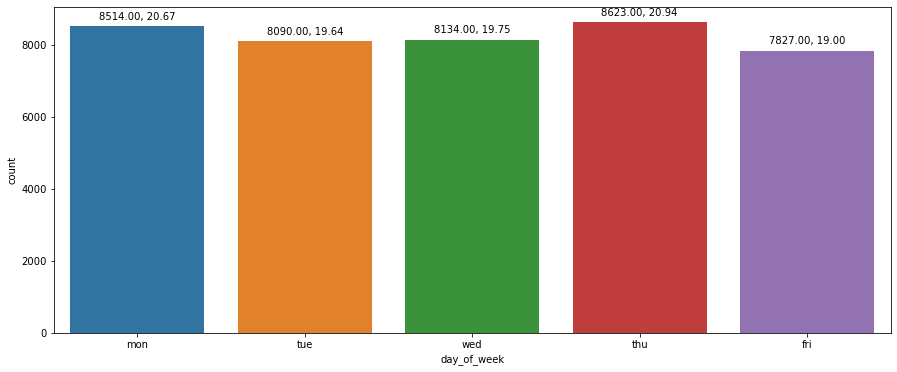

Poutcome


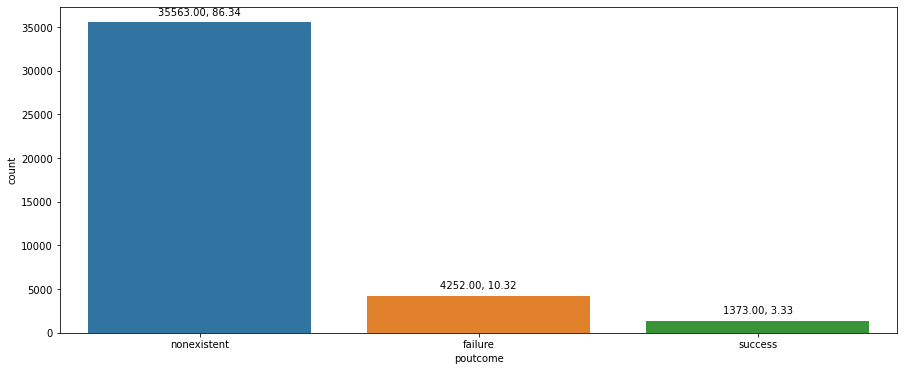

In [201]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

Grafik di atas menjunjukkan diagram batang dari variabel (features) yang bersifat kategorik, yaitu job, marital, education, default, housing, loan, contact, month, day_of_week, dan poutcome.

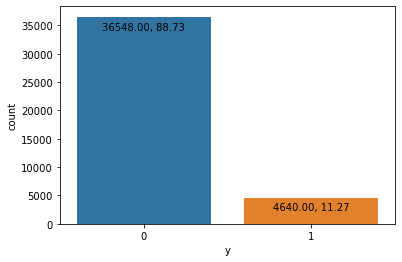

In [100]:
ax = sns.countplot(x = df["y"])
label_values(ax, spacing=-15)
plt.show()

diagram di atas menunjukkan diagram batang dari varabel yang dijadikan sebagai label yaitu variabel y.

<AxesSubplot:ylabel='job'>

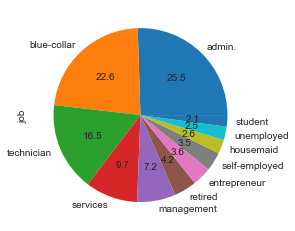

In [220]:
df['job'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

*Pie chart* di atas menunjukkan pembagian jenis job yang ada dalam dataset bank marketing data.

# Menentukan Model
digunakan seluruh variabel yang ada sebagai feature dan variabel y sebagai target. 

In [181]:
### Normalize Data
X = df.drop('y', 1)
y = df['y']

X = preprocessing.StandardScaler().fit_transform(X.astype(int))

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_16584/2652813898.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('y', 1)


## Logistic Regression

Model pertama yang akan dilakukan pembentukan model klasifikasi menggunakan *logistik regression*.
#### dilakukan import packages

In [182]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

dengan X dan y yang sudah ditentukan di atas, selanjutnya dilakukan pembagian data train dan data test dengan proporsi 70% dan 30%.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [221]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('accuracy = ', metrics.accuracy_score(y_test,lr_prediction))

accuracy =  0.9102532977259853


Akurasi yang didapatkan dari Model Regresi Logistik sebesar 0.9102532977259853.

In [222]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [0 0 0 ... 0 0 0]
y_test 15500    1
29034    0
11199    0
22247    0
27180    0
        ..
20920    0
15744    1
34965    0
4644     0
20742    1
Name: y, Length: 12357, dtype: int32


selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [118]:
print(accuracy_score(y_test,lr_prediction))
matrix=confusion_matrix(y_test,lr_prediction)
print(matrix)

0.9102532977259853
[[10684   285]
 [  824   564]]


## K-Nearest Neighbor
Model kedua yang akan dilakukan pembentukan model klasifikasi menggunakan K-Nearest Neighboar.
#### dilakukan import packages

In [119]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

dengan X dan y yang sudah ditentukan di atas, selanjutnya dilakukan pembagian data train dan data test dengan proporsi 70% dan 30%.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


### buat modul knn dengan neighbors k = 3

In [121]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
knn3_pred = knn.predict(X_test)

In [122]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, knn3_pred))

Accuracy: 0.8957675811281055


Akurasi yang didapatkan dari Model KNN dengan nilai k=3 sebesar 0.9102532977259853.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [124]:
print(accuracy_score(y_test,knn3_pred))
matrix=confusion_matrix(y_test,knn3_pred)
print(matrix)

0.8957675811281055
[[10488   481]
 [  807   581]]


### buat modul knn dengan neighbors k = 5

In [125]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
knn5_pred = knn.predict(X_test)

In [126]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, knn5_pred))

Accuracy: 0.9033746054867686


Akurasi yang didapatkan dari Model KNN dengan nilai k=5 sebesar 0.9102532977259853.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [129]:
print(accuracy_score(y_test,knn5_pred))
matrix=confusion_matrix(y_test,knn5_pred)
print(matrix)

0.9033746054867686
[[10601   368]
 [  826   562]]


### buat modul knn dengan neighbors k = 7

In [131]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
knn7_pred = knn.predict(X_test)

In [132]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, knn7_pred))

Accuracy: 0.9038601602330663


Akurasi yang didapatkan dari Model KNN dengan nilai k=5 sebesar 0.9102532977259853.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [133]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [134]:
print(accuracy_score(y_test,knn7_pred))
matrix=confusion_matrix(y_test,knn7_pred)
print(matrix)

0.9038601602330663
[[10640   329]
 [  859   529]]


## Support Vector Machine
Model ketiga yang akan dilakukan pembentukan model klasifikasi menggunakan Support Vector Machine.
#### dilakukan import packages

In [139]:
from sklearn import svm
from sklearn.model_selection import train_test_split

dengan X dan y yang sudah ditentukan di atas, selanjutnya dilakukan pembagian data train dan data test dengan proporsi 70% dan 30%.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [141]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) 

#Predict the response for test dataset
SVM_pred = clf.predict(X_test)

In [142]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, SVM_pred))

Accuracy: 0.8981144290685441


Akurasi yang didapatkan dari Model Support Vector Machine sebesar 0.8981144290685441.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [144]:
print(accuracy_score(y_test,SVM_pred))
matrix=confusion_matrix(y_test,SVM_pred)
print(matrix)

0.8981144290685441
[[10749   220]
 [ 1039   349]]


In [145]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, SVM_pred)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, SVM_pred))

Precision: 0.6133567662565905
Recall: 0.25144092219020175


Model SVM dapat menunjukkan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif sebesar 0.61 dan menunjukkan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif sebesar 0.25.

## Decision Tree
Model keempat yang akan dilakukan pembentukan model klasifikasi menggunakan *Decision Tree*.
#### dilakukan import packages

In [148]:
from sklearn import tree
from sklearn import metrics

dengan X dan y yang sudah ditentukan di atas, selanjutnya dilakukan pembagian data train dan data test dengan proporsi 70% dan 30%.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [151]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
DT_pred = clf.predict(X_test)

In [152]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, DT_pred))

Accuracy: 0.9030509023225702


Akurasi yang didapatkan dari Model Decision Tree sebesar 0.8981144290685441.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [154]:
print(accuracy_score(y_test,DT_pred))
matrix=confusion_matrix(y_test,DT_pred)
print(matrix)

0.9030509023225702
[[10580   389]
 [  809   579]]


## Random Forest
Model kelima yang akan dilakukan pembentukan model klasifikasi menggunakan *Random Forest*.
#### dilakukan import packages

In [155]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

dengan X dan y yang sudah ditentukan di atas, selanjutnya dilakukan pembagian data train dan data test dengan proporsi 70% dan 30%.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [157]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

RF_pred=clf.predict(X_test)

In [158]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, RF_pred))

Accuracy: 0.9148660678158129


Akurasi yang didapatkan dari Model Random Forest sebesar 0.9148660678158129.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [160]:
print(accuracy_score(y_test,RF_pred))
matrix=confusion_matrix(y_test,RF_pred)
print(matrix)

0.9148660678158129
[[10620   349]
 [  703   685]]


## Naive Bayes
Model pkeenam yang akan dilakukan pembentukan model klasifikasi menggunakan *Naive Bayes*.
#### dilakukan import packages

In [162]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

dengan X dan y yang sudah ditentukan di atas, selanjutnya dilakukan pembagian data train dan data test dengan proporsi 70% dan 30%.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [164]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
NB_pred = gnb.predict(X_test)

In [165]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, NB_pred))

Accuracy: 0.8485878449461843


Akurasi yang didapatkan dari Model Naive Bayes sebesar 0.9148660678158129.

selanjutnya akan dilihat *confussion matrix* hasil dari model yang terbentuk  :

   **## Confussion Matrix**

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [167]:
print(accuracy_score(y_test,NB_pred))
matrix=confusion_matrix(y_test,NB_pred)
print(matrix)

0.8485878449461843
[[9650 1319]
 [ 552  836]]


## Ringkasan 

In [168]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))
print('K-Nearest Neighbor 3 Accuracy:',metrics.accuracy_score(y_test, knn3_pred))
print('K-Nearest Neighbor 5 Accuracy:',metrics.accuracy_score(y_test, knn5_pred))
print('K-Nearest Neighbor 7 Accuracy:',metrics.accuracy_score(y_test, knn7_pred))
print('Support Vector Machine Accuracy:', metrics.accuracy_score(y_test, SVM_pred))
print('Decision Tree Accuracy:', metrics.accuracy_score(y_test, DT_pred))
print('Random Forest Accuracy:', metrics.accuracy_score(y_test, RF_pred))
print('Naive Bayes Accuracy:', metrics.accuracy_score(y_test, NB_pred))

Logistic Regression accuracy =  0.9102532977259853
K-Nearest Neighbor 3 Accuracy: 0.8957675811281055
K-Nearest Neighbor 5 Accuracy: 0.9033746054867686
K-Nearest Neighbor 7 Accuracy: 0.9038601602330663
Support Vector Machine Accuracy: 0.8981144290685441
Decision Tree Accuracy: 0.9030509023225702
Random Forest Accuracy: 0.9148660678158129
Naive Bayes Accuracy: 0.8485878449461843


Berdasarkan beberapa pemodelan yang dilakuakn di atas yaitu *Logistic regression, K-Nearest Neighbor with k = 3, K-Nearest Neighbor with k = 5, K-Nearest Neighbor with k = 7, Support Vector Machine, Decision Tree, Random Forest, dan Naive Bayes* didapatkan akurasi tertinggi terdapat pada model *Random Forest* dengan nilai akurasi sebesar 0.9148660678158129 atau 91%.  Model *Random Forest* dapat memprediksi data Bank Marketing Data untuk varibel y dengan benar sebesar 91%.

# FIRYA FATIN RAHMADANTI
PYTN-KS06-005
ASSIGNMENT3